# Investigate Business Hotel using Data Visualization

<p align="center">
    <img src="../images/hotel_booking_img.jpg" width="400">
</p>

**Project Overview**:<br>
It is very important for a company always to analyze its business performance. On this occasion, we will delve deeper into business in the hospitality sector. Our focus is to find out how our customers behave in making hotel reservations, and its relationship to the rate of cancelation of hotel reservations. We will present the results of the insights we find in data visualization to make it easier to understand and more persuasive.

**Project Goals**:<br>
1. Find out how customers behave in making hotel reservations.
2. Find out the relationship between customer behavior in making hotel reservations and the rate of cancelation of hotel reservations.
3. Present the results of the insights we find in data visualization to make it easier to understand and more persuasive.

**Project Objective**:<br>
1. Data Preparation
2. Data Visualization
3. Insight and Conclusion

## Data Preprocessing

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### Load Data and Preliminary Data Exploration

In [2]:
# Importing the hotel bookings data from a CSV file into a pandas DataFrame
df = pd.read_csv('../data/hotel_bookings_data.csv')

# Setting pandas option to display all columns of the DataFrame when it is printed
pd.set_option('display.max_columns', None)

# Displaying the first 2 rows of the DataFrame for a quick overview of the data
display(df.head(2))

# Displaying a concise summary of the DataFrame including the number of non-null entries in each column
display(df.info())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

None

Dataframe info summary:
- There's 4 columns containing missing values: `children`, `country`, `agent`, and `company`.
- There's 2 columns containing datetime data type: `reservation_status_date` and `arrival_date_month`.

In [3]:
cats = df.select_dtypes('object')
nums = df.select_dtypes('number')

print('Statistical summary for categorical variables')
display(cats.describe())

print('Statistical summary for numerical variables')
display(nums.describe())

# Display all the value counts from the categorical columns
for col in cats.columns:
    print(f'Value counts for {col}')
    print(cats[col].value_counts())
    print('='*50)

Statistical summary for categorical variables


,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


Statistical summary for numerical variables


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Value counts for hotel
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64
Value counts for arrival_date_month
arrival_date_month
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: count, dtype: int64
Value counts for meal
meal
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: count, dtype: int64
Value counts for city
city
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: count, Length: 177, dtype: int64
Value coun

Category data Statistical Summary:
- `hotel`: There are 2 types of hotel, City Hotel and Resort Hotel.
- `meal`: There are 5 types of meal, Breakfast are the most ordered meal.
- `city`: There are 177 countries that make reservations, Kota Denpasar is the most city that made reservations.
- `market_segment`: There are 8 types of market segment, Online TA (Travel Agent) is the most market segment.
- `distribution_channel`: There are 5 types of distribution channel, TA/TO (Travel Agent/Tour Operator) is the most distribution channel.
- `deposit_type`: There are 3 types of deposit type, No Deposit is the most deposit type.
- `customer_type`: There are 4 types of customer type, Personal Travel is the most customer type.
- `reservation_status`: There are 3 types of reservation status, Check-Out is the most reservation status.

Numerical data Statistical Summary:
- `is_cancelled` & `is_repeated_guest`: The min value is 0 and the max value is 1, which means this column is a binary column.
- `children` & `babies`: the max value of this column is 10, which is quite high and rare.

For the column that supposed to be a binary categorical will be changed to a binary data type for better analysis. For the column that has a negative value, we will remove the negative value because it is impossible for the price to be negative.

### Handling Missing Values

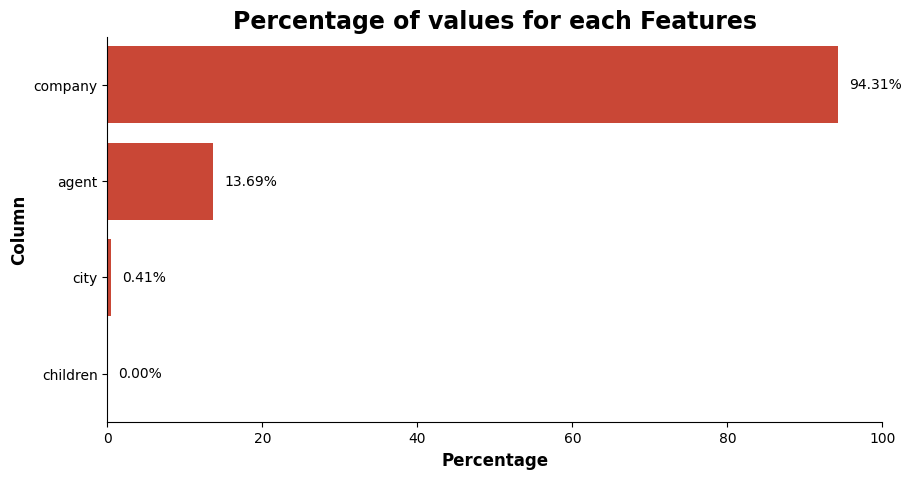

In [4]:
# Copy the original dataframe to avoid modifying the original data
dfs = df.copy()

# Calculate the percentage of missing values in each column
missing = dfs.isnull().sum()*100 / len(dfs)

# Create a new DataFrame to store the column names and their corresponding missing values percentages
missing_data = pd.DataFrame({'column':df.columns,
                                   'missing_percentage %':missing.values})


# FIlter out the columns that have no missing values
missing_data = missing_data[missing_data['missing_percentage %'] > 0]

# Sort the DataFrame by the mising percentage in descending order
missing_data = missing_data.sort_values('missing_percentage %', ascending=False)

# Create a bar plot to visualize the missing data
plt.figure(figsize=(10,5))
ax = sns.barplot(x='missing_percentage %', y='column', data=missing_data, color='#E1341E')

# Annotate the bars with the missing percentage values
for p in ax.patches:
    ax.annotate('%.2f' % p.get_width() + '%', xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(8,0), textcoords='offset points', ha='left', va='center', fontsize=10)

# Set the title and labels of the plot
plt.title('Percentage of values for each Features', fontsize=17, fontweight='bold')
sns.despine()
plt.ylabel('Column', fontsize=12, fontweight='bold')
plt.xlabel('Percentage', fontsize=12, fontweight='bold')
plt.xlim(0,100)
plt.show()

In [5]:
dfs[dfs.agent.notna()].sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
2463,Resort Hotel,1,73,2017,December,43,18,2,3,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,65.00,0,3,Canceled
1422,Resort Hotel,0,30,2017,October,35,28,2,5,2,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,250.0,NaN,0,Personal,150.71,0,0,Check-Out
41760,City Hotel,0,3,2017,October,35,23,2,0,2,0.0,0,Breakfast,Kota Batu,Direct,Direct,0,0,0,0,No Deposit,14.0,NaN,0,Personal,75.00,0,1,Check-Out


As we have seen before that these 4 columns contain missing values,
- For the `company` column will be dropped because it contains too many missing values (>90%)
- `agent` and `children` column contain missing values seems reasonable, because it is possible that the customer doesn't use the agent to make a reservation, and is is possible that the customer doesn't have children. So, we will fill the missing values with 0.
- For the `city` column will be filled/imputed with the 'unknown' value, because it is possible that the customer doesn't want to share their city information.

In [6]:
# impute missing values for the 'agent', 'children', and 'city' columns
dfs.fillna({'agent':0}, inplace=True)
dfs.fillna({'children':0}, inplace=True)
dfs.fillna({'city':'Unknown'}, inplace=True)

# drop company column as it has more than 90% missing values
dfs.drop(columns=['company'], inplace=True)

### Replace values

change the data type of the `is_cancelled` and `is_repeated_guest` column to category data type.

In [7]:
# Define a dictionary to map cancellation status from numerical to categorical data
map_cancel = {
    0: 'not canceled',
    1: 'canceled'
}

# Apply the mapping to the 'is_canceled' column
dfs['is_canceled'] = dfs['is_canceled'].map(map_cancel)

# Define a dictionary to map guest repeat status from numerical to categorical data
map_repeat = {
    0: 'first time',
    1: 'repeat'
}

# Apply the mapping to the 'is_repeated_guest' column
dfs['is_repeated_guest'] = dfs['is_repeated_guest'].map(map_repeat)

# Replace the column with undefined values with 'other'
dfs['meal'] = dfs['meal'].replace('Undefined', 'Other')
dfs['market_segment'] = dfs['market_segment'].replace('Undefined', 'Other')
dfs['distribution_channel'] = dfs['distribution_channel'].replace('Undefined', 'Other')

### Drop invalid data

In [8]:
dfs[(dfs['children']==0) & (dfs['adults'] == 0) & (dfs['babies'] == 0)].shape[0]

180

There's 180 data record that has 0 adults and children, this can be considered as an invalid data record. We will remove this data record.

In [9]:
# drop rows where both adults, children, and babies are 0
dfs_clean = dfs[~((dfs['children']==0) & (dfs['adults']==0) & (dfs['babies']==0))]

# Task 2 : Monthly Hotel Booking Analysis Based On Hotel Type

### Create an aggregate table that shows the comparison of the number of hotel bookings each month based on hotel type

In [10]:
# Create a copy of the original dataframe to avoid modifying the original data
dfx = dfs.copy()

# Group the data by hotel, arrival year and arrival month, and count the number of bookings for each group
booking_counts = dfx.groupby(['hotel', 'arrival_date_year', 'arrival_date_month'])['hotel'].count().rename("count_booking").reset_index()

# Sort the booking counts dataframe by arrival month for easier analysis
booking_counts.sort_values(by='arrival_date_month')

,hotel,arrival_date_year,arrival_date_month,count_booking
32,Resort Hotel,2018,April,1520
44,Resort Hotel,2019,April,1583
6,City Hotel,2018,April,2371
18,City Hotel,2019,April,2594
45,Resort Hotel,2019,August,1676
33,Resort Hotel,2018,August,1369
7,City Hotel,2018,August,3923
19,City Hotel,2019,August,3971
34,Resort Hotel,2018,December,1984
26,Resort Hotel,2017,December,1571


The aggregate table not yet ordered based on the month order, so let's reorder the month order.

### Order the data based on month

In [11]:
# Define the correct order of the months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'arrival_date_month' column to a categorical type with the defined order
# This allows for proper sorting and visualization in the correct month order
booking_counts['arrival_date_month'] = pd.Categorical(booking_counts['arrival_date_month'], categories=months_order, ordered=True)

# Sort the dataframe first by year, then by month (in the correct order)
booking_counts = booking_counts.sort_values(['arrival_date_year', 'arrival_date_month'])

# Display sorted aggregated booking counts
booking_counts

,hotel,arrival_date_year,arrival_date_month,count_booking
2,City Hotel,2017,January,1235
28,Resort Hotel,2017,January,1105
1,City Hotel,2017,February,1654
27,Resort Hotel,2017,February,1266
5,City Hotel,2017,September,1398
31,Resort Hotel,2017,September,1378
4,City Hotel,2017,October,2480
30,Resort Hotel,2017,October,1409
3,City Hotel,2017,November,3529
29,Resort Hotel,2017,November,1585


### Normalized the data

In [12]:
# Generate all posible combinations of hotel, year, and month
all_combinations = pd.MultiIndex.from_product([
    booking_counts['hotel'].unique(),
    booking_counts['arrival_date_year'].unique(),
    months_order
], names=['hotel', 'arrival_date_year', 'arrival_date_month']).to_frame(index=False)

# Merge with original booking counts, filling missing combinations with NaN
booking_counts_normalized = pd.merge(all_combinations, booking_counts, how='left', on=['hotel', 'arrival_date_year', 'arrival_date_month'])

# Normalize the booking counts by dividing the 2018 counts by 3 to account for the incomplete year
divided_counts = booking_counts[(booking_counts['arrival_date_year'] == 2018)][['hotel', 'arrival_date_month', 'count_booking']].copy()
divided_counts['count_booking'] /= 3
divided_counts.set_index(['hotel', 'arrival_date_month'], inplace=True)

# Fill missing booking counts for 2017 and 2019 with normalized 2018 counts
for year in [2017, 2019]:
    for month in months_order:
        for hotel in booking_counts['hotel'].unique():
            mask = (booking_counts_normalized['hotel'] == hotel) & (booking_counts_normalized['arrival_date_year'] == year) & (booking_counts_normalized['arrival_date_month'] == month)
            booking_counts_normalized.loc[mask, 'count_booking'] = booking_counts_normalized.loc[mask, 'count_booking'].fillna(divided_counts.loc[(hotel, month), 'count_booking'])

# Display the final normalized booking counts dataframe
booking_counts_normalized

,hotel,arrival_date_year,arrival_date_month,count_booking
0,City Hotel,2017,January,1235.000000
1,City Hotel,2017,February,1654.000000
2,City Hotel,2017,March,454.666667
3,City Hotel,2017,April,790.333333
4,City Hotel,2017,May,1015.333333
...,...,...,...,...
67,Resort Hotel,2019,August,1676.000000
68,Resort Hotel,2019,September,1754.000000
69,Resort Hotel,2019,October,1800.000000
70,Resort Hotel,2019,November,507.666667


In [13]:
# Sum the booking counts for each hotel and month aross all years
booking_counts_sum = booking_counts_normalized.groupby(['hotel', 'arrival_date_month'])['count_booking'].sum().reset_index()

# Convert the 'arrival_date_month' column to a categorical type with the defined order
booking_counts_sum['arrival_date_month'] = pd.Categorical(booking_counts_sum['arrival_date_month'], categories=months_order, ordered=True)

# Sort the dataframe by month (in the correct order)
booking_counts_sum = booking_counts_sum.sort_values(['arrival_date_month'])

# Display the final aggregated booking counts across all years
booking_counts_sum

,hotel,arrival_date_month,count_booking
4,City Hotel,January,5397.666667
16,Resort Hotel,January,2881.000000
3,City Hotel,February,4958.000000
15,Resort Hotel,February,3108.666667
7,City Hotel,March,4190.666667
19,Resort Hotel,March,2487.666667
0,City Hotel,April,5755.333333
12,Resort Hotel,April,3609.666667
20,Resort Hotel,May,3928.666667
8,City Hotel,May,7473.333333


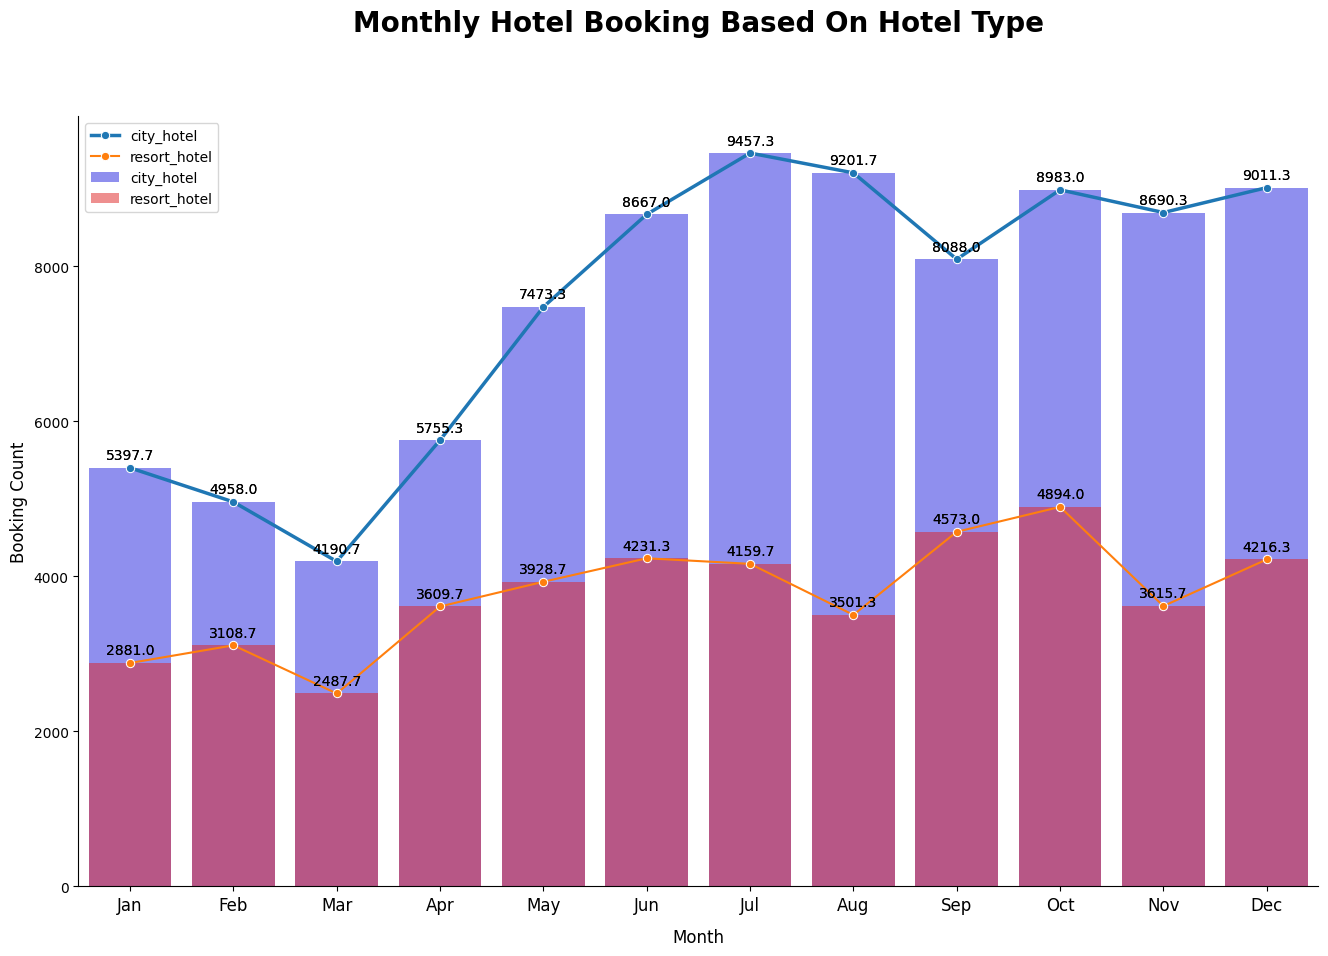

In [14]:
# Seperate the city_hotel data and resort_hotel data
city_hotel = booking_counts_sum.loc[booking_counts_sum.hotel=='City Hotel']
resort_hotel = booking_counts_sum.loc[booking_counts_sum.hotel=='Resort Hotel']

# plot the data with line plot from seaborn
plt.figure(figsize=(16,10))

# lineplot for city_hotel
sns.lineplot(x='arrival_date_month', y='count_booking', data=city_hotel, marker='o', label='city_hotel', linewidth=2.5)

# lineplot for resort_hotel
sns.lineplot(x='arrival_date_month', y='count_booking', data=resort_hotel, marker='o', label='resort_hotel')

# barplot for city_hotel
city_bar = sns.barplot(x='arrival_date_month', y='count_booking', data=city_hotel, label='city_hotel', color='b', alpha=0.5)

# barplot for resort_hotel
resort_bar = sns.barplot(x='arrival_date_month', y='count_booking', data=resort_hotel, label='resort_hotel', color='r', alpha=0.5)

sns.despine()

plt.legend()
plt.title('Monthly Hotel Booking Based On Hotel Type', fontsize=20, fontweight='bold', y=1.1)
plt.xlabel('Month', fontsize=12, labelpad=10)
xticks_labels = [month[:3] for month in months_order]
plt.xticks(ticks=range(12), labels=xticks_labels, fontsize=12)
plt.ylabel('Booking Count', fontsize=12)

# Add number annotations
for p in city_bar.patches:
    city_bar.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

for p in resort_bar.patches:
    resort_bar.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

### Task 3 Impact Analysis Of Stay Duration On Hotel Bookings Cancellation Rates

### Create a new column contains stay in duration

In [15]:
# Create a new column 'stay_in_duration' by adding the 'stays_in_weekend_nights' and 'stays_in_weekdays_nights' columns
dfx['stay_in_duration'] = dfx['stays_in_weekdays_nights'] + dfx['stays_in_weekend_nights']

### Group the values from stay in duration column

In [16]:
dfx.stay_in_duration.value_counts()

stay_in_duration
2     27643
3     27076
1     21020
4     17383
7      8655
5      7784
6      3857
8      1161
10     1139
14      916
9       841
0       715
11      396
12      223
13      142
15       75
21       71
16       40
25       37
18       35
28       35
19       22
17       20
29       14
20       14
22       14
30       13
23        8
24        6
26        6
27        5
35        5
42        4
33        3
56        2
34        1
57        1
49        1
48        1
69        1
38        1
45        1
60        1
46        1
43        1
Name: count, dtype: int64

<Axes: xlabel='stay_in_duration', ylabel='Count'>

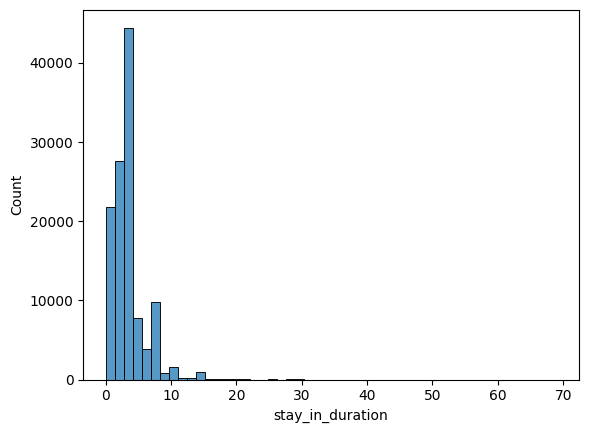

In [17]:
sns.histplot(dfx['stay_in_duration'], bins=50)

because the `stay_in_duration` value distribution most of the values are concetrated in the range 0-10, so we want to have more granular bins in this range, and larger bins for the higher values.

In [18]:
# Define bins for categoriczation, ranging from 0 to 10, then 15, 20, and above
bins = list(range(0,11)) + [15, 20, np.inf]

# Define labels for each bin, corresponding to the range defined in 'bins'
labels = ['0-1'] + [str(i) for i in range(2, 11)] + ['11-15', '16-20', '>20']

# Categorize 'stay_in_duration' into bins with corresponding labels, storing the result in a new column 'stay_duration_bins
dfx['stay_duration_bins'] = pd.cut(dfx['stay_in_duration'], bins, labels=labels)

### Create an aggregate table that shows the ratio of the number of canceled hotel reservations to the duration of stay for each type of hotel

In [19]:
# Group the data by 'hotel', 'is_canceled', and 'stay_duration_bins', and count the number of bookings for each group
data_cancel = dfx.groupby(['hotel', 'is_canceled', 'stay_duration_bins'], observed=True)['is_canceled'].count().reset_index(name='count')

# Pivot the 'data_cancel' DataFrame to create a new DataFrame with 'hotel' and 'stay_duration_bins' as index, 'is_canceled' as columns, and 'count' as values
data_cancel_pivot = data_cancel.pivot(index=['hotel', 'stay_duration_bins'], columns='is_canceled', values='count').reset_index()

# Rename the columns of 'data_cancel_pivot'
data_cancel_pivot.columns = ['hotel', 'stay_duration_bins', 'not_canceled', 'canceled']

# Calculate the cancelation rate as the ratio of 'canceled' to the sum of 'not_canceled' and 'canceled'
data_cancel_pivot['cancelation_rate'] = data_cancel_pivot['canceled'] / (data_cancel_pivot['not_canceled'] + data_cancel_pivot['canceled'])

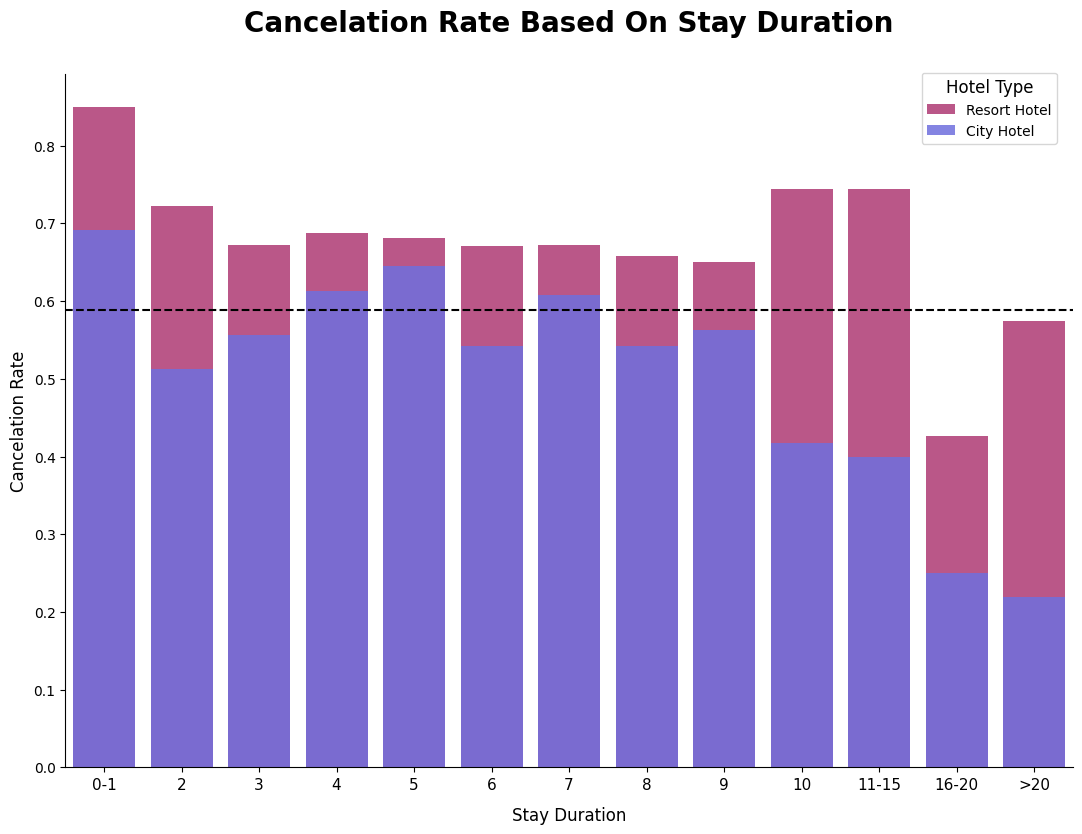

In [73]:
# Define the color palette for the stacked bar plot
colors = ['#5D5DEF', '#C22673']

# Create a stacked bar plot to visualize the cancelation rate beased on the duration of stay
plt.figure(figsize=(13, 9))

# Stacked barplot for resort hotel
sns.barplot(
    x='stay_duration_bins',
    y='cancelation_rate',
    data=data_cancel_pivot[data_cancel_pivot['hotel'] == 'Resort Hotel'],
    color=colors[1],
    label='Resort Hotel',
    alpha=0.85
)

# Stacked barplot for city hotel
sns.barplot(
    x='stay_duration_bins',
    y='cancelation_rate',
    data=data_cancel_pivot[data_cancel_pivot['hotel'] == 'City Hotel'],
    color=colors[0],
    label='City Hotel',
    alpha=0.85
)

sns.despine()

# plt.legend(title='Hotel Type', title_fontsize='13', fontsize='12', loc='upper right')
plt.legend(title='Hotel Type', title_fontsize='12', fontsize='12', prop={'size': 10}, loc=[0.85, 0.9])
avg_cancelation_rate = data_cancel_pivot.cancelation_rate.mean()
plt.axhline(avg_cancelation_rate, color='black', linestyle='--', label=f'Average Cancellation Rate: {avg_cancelation_rate:.2f}')
plt.title('Cancelation Rate Based On Stay Duration', fontsize=20, fontweight='bold', y=1.05)
plt.xlabel('Stay Duration', fontsize=12, labelpad=10)
plt.xticks(fontsize=11)
plt.ylabel('Cancelation Rate', fontsize=12)


plt.show()

In [74]:
# # Define a color palette
# palettes = {"City Hotel": "#5D5DEF", "Resort Hotel": "#C22673"}

# plt.figure(figsize=(12,7))
# ax = sns.barplot(
#     x='stay_duration_bins',
#     y='cancelation_rate',
#     hue='hotel',
#     data=data_cancel_pivot,
#     palette=palettes,
#     alpha=0.85
#     # order=orders_cancel 
# )

# sns.despine()
# avg_cancelation_rate = data_cancel_pivot.cancelation_rate.mean()
# plt.axhline(avg_cancelation_rate, color='r', linestyle='--', label=f'Average Cancellation Rate: {avg_cancelation_rate:.2f}')
# plt.legend(title='Hotel Type', title_fontsize='12', fontsize='12', prop={'size': 11}, loc=[0.7, 0.9])
# plt.title('Cancellation Rates by Stay Duration & Hotel Type', fontsize=20, fontweight='bold', y=1.13)
# plt.xlabel('Stay Duration Group', fontsize=13)
# plt.ylabel('Cancelation Ratio', fontsize=13)
# plt.show()

### Task 4 Impact Analysis Of Stay Duration On Hotel Bookings Cancellation Rates

In [41]:
dfx.lead_time.value_counts().head(30)

lead_time
0     6264
1     3445
2     2065
3     1815
4     1710
5     1563
6     1444
7     1329
8     1138
12    1079
11    1054
9      991
10     974
14     964
16     941
17     879
19     837
15     836
34     828
18     826
13     821
28     820
20     750
40     722
29     712
22     707
32     690
31     683
21     678
56     676
Name: count, dtype: int64

In [42]:
leadtime_category = [
    (dfx['lead_time'] >= 361),
    (dfx['lead_time'] >= 271) & (dfx['stay_in_duration'] <= 360),
    (dfx['lead_time'] >= 181) & (dfx['stay_in_duration'] <= 270), 
    (dfx['lead_time'] >= 91) & (dfx['stay_in_duration'] <= 180), 
    (dfx['lead_time'] >= 31) & (dfx['stay_in_duration'] <= 90), 
    (dfx['lead_time'] <= 30 ) 
]
leadtime_group = ['>12 Months', '9-12 Months', '6-9 Months', '3-6 Months', '1-3 Months', '<1 Month']
dfx['lead_time_group'] = np.select(leadtime_category, leadtime_group)

In [43]:
grouped = dfx.groupby(['hotel', 'is_canceled', 'lead_time_group'])['is_canceled'].count().rename("count_booking").reset_index()

pivot_lt = grouped.pivot_table(values='count_booking', index=['hotel', 'lead_time_group'], columns='is_canceled')

pivot_lt['cancelation_ratio'] = round(pivot_lt[0] / (pivot_lt[0] + pivot_lt[1]) * 100, 2)

pivot_lt.reset_index(inplace=True)
pivot_lt = pivot_lt[['hotel', 'lead_time_group', 'cancelation_ratio']]
pivot_lt

is_canceled,hotel,lead_time_group,cancelation_ratio
0,City Hotel,1-3 Months,60.05
1,City Hotel,3-6 Months,51.97
2,City Hotel,6-9 Months,47.53
3,City Hotel,9-12 Months,23.76
4,City Hotel,<1 Month,77.70
5,City Hotel,>12 Months,27.58
6,Resort Hotel,1-3 Months,67.54
7,Resort Hotel,3-6 Months,62.56
8,Resort Hotel,6-9 Months,58.44
9,Resort Hotel,9-12 Months,57.61


C:\Users\azary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\azary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


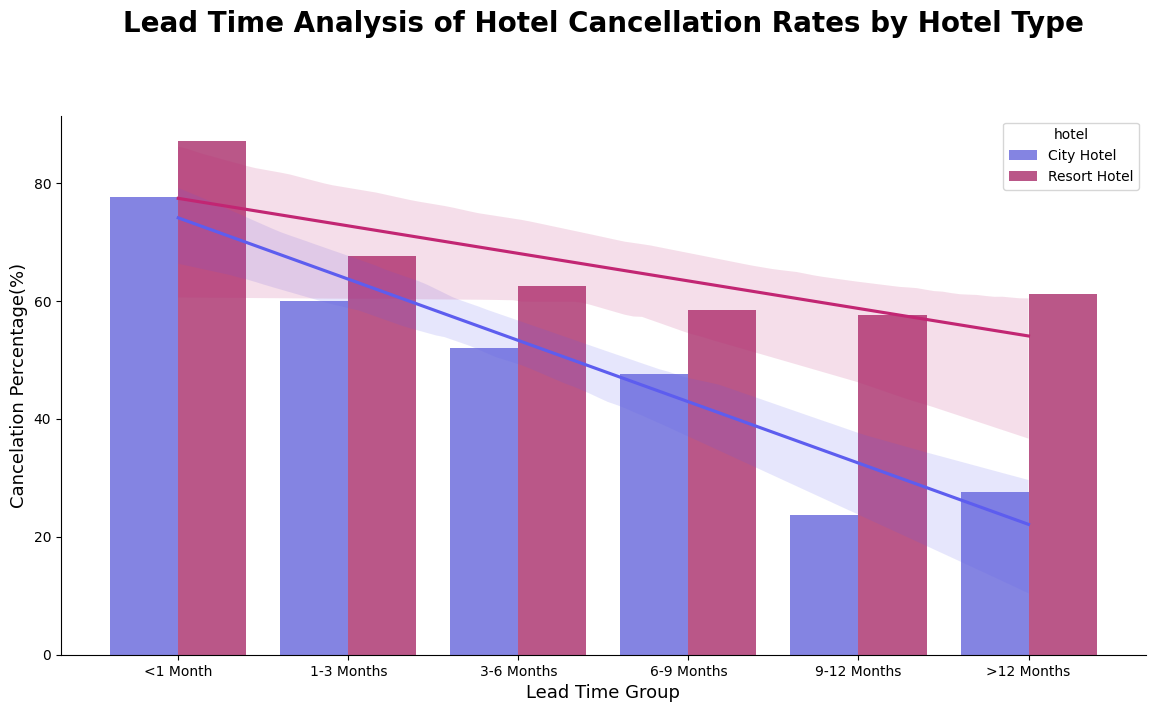

In [47]:
# Define a color palette
palettes = {"City Hotel": "#5D5DEF", "Resort Hotel": "#C22673"}

orders_cancel_lt = ['<1 Month', '1-3 Months', '3-6 Months', '6-9 Months', '9-12 Months', '>12 Months']

# Convert categorical data to numerical
pivot_lt['lead_time_group_num'] = pivot_lt['lead_time_group'].map({v: k for k, v in enumerate(orders_cancel_lt)})

plt.figure(figsize=(14,7))
ax = sns.barplot(x='lead_time_group', y='cancelation_ratio', hue='hotel', data=pivot_lt, palette=palettes, alpha=0.85, order=orders_cancel_lt)

#trend lines
for hotel, color in palettes.items():
    sns.regplot(x='lead_time_group_num', y='cancelation_ratio', data=pivot_lt[pivot_lt['hotel'] == hotel], color=color, scatter=False)

sns.despine()
plt.title('Lead Time Analysis of Hotel Cancellation Rates by Hotel Type', fontsize=20, fontweight='bold', y=1.14)
plt.xlabel('Lead Time Group', fontsize=13)
plt.ylabel('Cancelation Percentage(%)', fontsize=13)
plt.show()